# Performing EDA and Visualizing the insights taken from Titanic dataset.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Cleaning the dataset and deriving few insights is the main agenda here


# Importing necessary libraries and reading the dataset

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv('Titanic_dataset.csv')

# Checking the spread of data in top and bottom

In [29]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


Inference: Top and bottom has the passengers data who are mid aged and there are many missing values which needs to be handled

# Size of dataset

In [5]:
df.shape

(891, 12)

Observation: Dataset has 891 observations/Passenger with 12 attributes/details

# Data types info and statistical analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Observation: The least age of people who travelled in Titanic is less than a year old and maximum is 80. 50% of the people who travelled where less than 28 years old. The Fare/Price of ticket ranges from 0 to 512 based on travelling class

# Checking for null values

In [8]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Survived         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Inference: We have infromation of Passengers class travelled but not their ages or cabin chosen. Embarkment is also missing for 2 passengers

# Dropping the columns which are not contributing for prediction

In [9]:
df.drop(['Name','Embarked','Ticket'], axis=1, inplace= True)

In [10]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,0
1,2,1,female,38.0,1,0,71.2833,C85,1
2,3,3,female,26.0,0,0,7.9250,NaN,1
3,4,1,female,35.0,1,0,53.1000,C123,1
4,5,3,male,35.0,0,0,8.0500,NaN,0


# Handling missing values

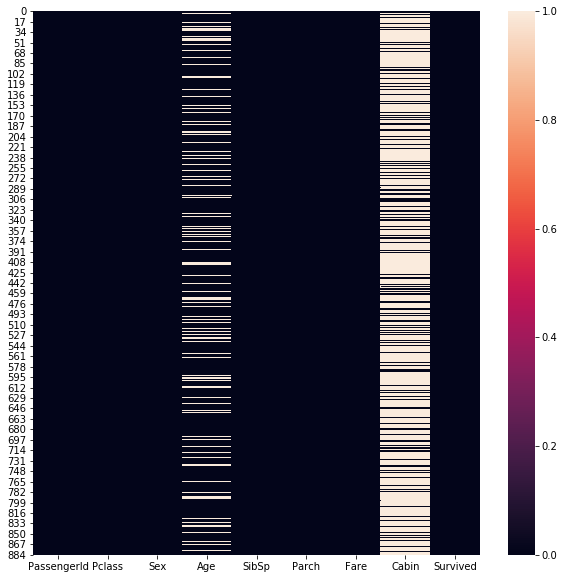

In [11]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull())

In [12]:
(df.isnull().sum()/df.shape[1]).sort_values(ascending=False)

Cabin          76.333333
Age            19.666667
Survived        0.000000
Fare            0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64

Inference: As 76.33% of cabin information is not found, dropping the attribute would be approritate and handling it by predicting 76.33% values might bias the dataset and hinder the model

In [13]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,male,22.0,1,0,7.2500,0
1,2,1,female,38.0,1,0,71.2833,1
2,3,3,female,26.0,0,0,7.9250,1
3,4,1,female,35.0,1,0,53.1000,1
4,5,3,male,35.0,0,0,8.0500,0


In [14]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Infecrence: As 75% of the passengers are below 39 years and average age of people travelled in tiitanic is 29.699, missing values can be handled by stastical method

In [15]:
df.Age=df.Age.fillna(df.Age.mean())

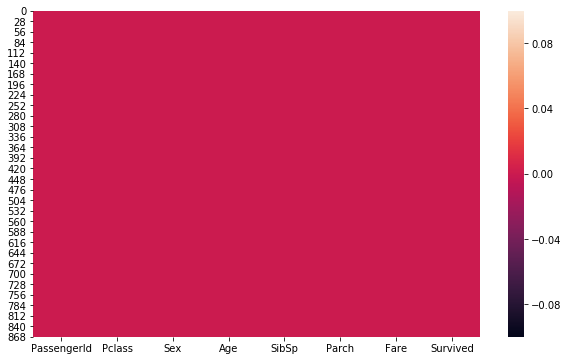

In [16]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.isnull())

In [17]:
df.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Survived       False
dtype: bool

Observation: Dataset is cleaned and null values are handled

# Data Visulization and finding patterns and insights

0    549
1    342
Name: Survived, dtype: int64

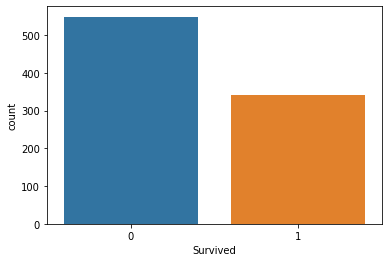

In [18]:
sns.countplot(df.Survived)
df.Survived.value_counts()

Observation: Out of 891 passenger 549 passengers did not survive and rest 342 did

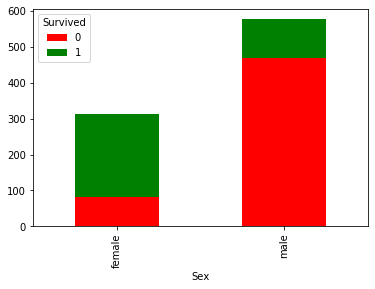

In [19]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar', stacked=True, color='rg')

Observation: The number of male passengers is higher than female and the life lost also reflects the same

([<matplotlib.patches.Wedge at 0x1c8c4d93948>,
 [Text(-0.1916903641021052, 1.1845905639968617, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.11181937905956135, 0.6910111623315025, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

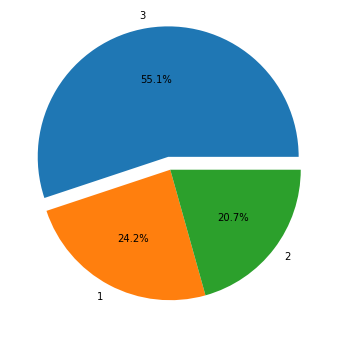

In [20]:
plt.subplots(figsize=(6,6))
plt.pie(df.Pclass.value_counts(), autopct='%1.1f%%', explode=[0.1,0,0], labels=[3,1,2])

Observation: 55.1% belongs to Passenger class 3 which is the 3rd class seats.

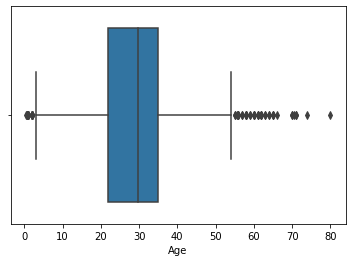

In [21]:
sns.boxplot(df.Age)

Inference: There are many outliers who are aged more than 55 years but maximum number of passengers are between 3 to 54 years old.

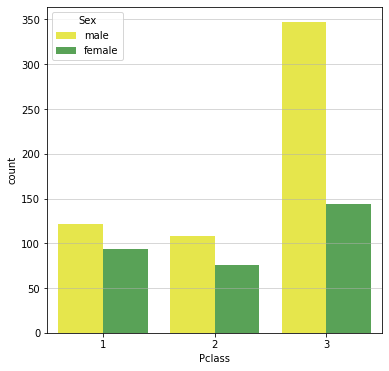

In [22]:
plt.subplots(figsize=(6,6))
plt.grid(True, linewidth=0.5, linestyle='-')
sns.countplot(df.Pclass, hue=df.Sex, palette='Set1_r')

Inference: There are many male passengers travelling in PClass 3 than any other class and gender

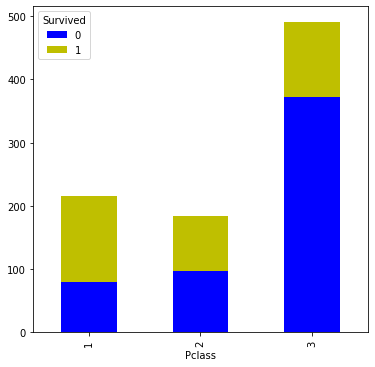

In [23]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar', stacked=True, color='by', figsize=(6,6))

Observation: Maximum number of lives lost was from Pclass 3.

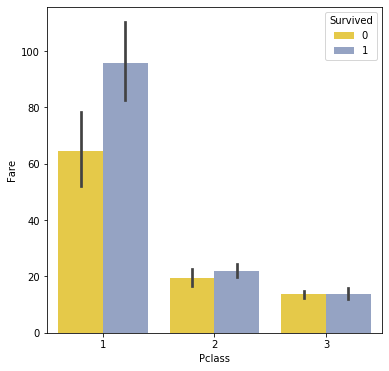

In [24]:
plt.subplots(figsize=(6,6))
sns.barplot(df.Pclass,df.Fare, palette='Set2_r', hue=df.Survived)

Observation: Maximum Pclass 1 were survived as they had paid high for their tickets and safety but Pclass 3 had to face the consequences of tragedy

In [25]:
df.Pclass=df.Pclass.astype(object)

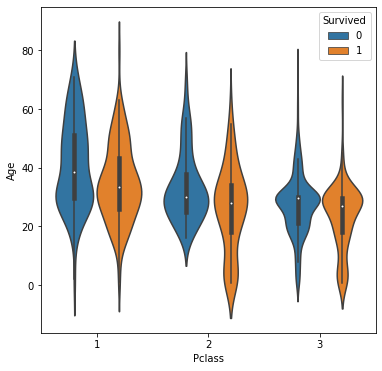

In [26]:
plt.subplots(figsize=(6,6))
sns.violinplot(df.Pclass,df.Age, hue=df.Survived)

Observation: Most of the passengers aged between 20 and 40 are from Passenger class 3 and life lost was also from same age group